<a href="https://colab.research.google.com/github/whoisorioki/DS-ML-Projects/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import scipy.stats as stats


In [ ]:
# Load the MNIST data
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[18])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  34 169
  250  40   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  58 242 221
  143  17   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  75 247 143  10
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  37 245 184   2   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8 192 200  14   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 139 247  28   

In [ ]:
print(X_train[16].shape)

(28, 28)


9


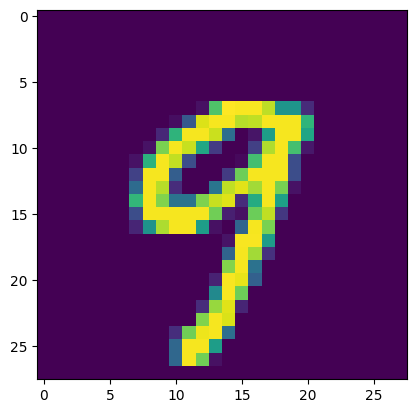

In [ ]:
# For displaying an image
plt.imshow(X_train[45])
plt.show

print(Y_train[45])

## Image Levels

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
# Unique values in Y_train
print(np.unique(Y_train))
# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Scale the values
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[15])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Build the Neural Network

In [ ]:
# Setting the layers of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8605 - loss: 0.4966
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9555 - loss: 0.1498
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9677 - loss: 0.1084
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9740 - loss: 0.0844
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9789 - loss: 0.0682
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0566
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9851 - loss: 0.0478
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0415
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0351
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0329


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9678 - loss: 0.1411

Test accuracy: 97.2%


In [ ]:
print(Y_test[0])

7


In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred.shape

In [ ]:
print(y_pred[0])

In [ ]:
# Converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

In [ ]:
# Converting probabilities to predicted class labels for all the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_labels))

In [ ]:
# Plotting Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Building a prediction System

In [ ]:
# Sample image
image_input = '/content/MNIST_digit.png'


In [ ]:
# Load the input image in grayscale
image = cv2.imread(image_input, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

In [ ]:
# Resize the image to 28x28
image_resized = cv2.resize(image, (28, 28))
cv2_imshow(image_resized)

In [ ]:
# Normalize the image and reshape
image_resized = image_resized / 255.0
image_resized = image_resized.reshape(1, 28, 28)
image_resized.shape

In [ ]:
# Make a prediction
prediction = model.predict(image_resized)

predicted_label = np.argmax(prediction)
print(f'Predicted Label: {predicted_label}')


In [ ]:
# Display the prediction
plt.imshow(image_resized.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

Thank you!
